# FaceRecognition on the CelebA dataset

In [1]:
import face_recognition
import cv2
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import gridspec
from random import randint

## Load random images

In [2]:
NR_CELEBA_IMAGES = 100000
PATH_TO_CELEBA = Path('/nfs/students/summer-term-2018/project_2/data/CelebA/Img/')

image_batch = {}

# Load random data
number_images = 20
for i in range(number_images):
    img_idx = randint(0, NR_CELEBA_IMAGES)
    file_name = str(img_idx).zfill(6) + '.jpg'
    image_file = PATH_TO_CELEBA / file_name
    image_batch[file_name] = face_recognition.load_image_file(image_file)

## Extract faces

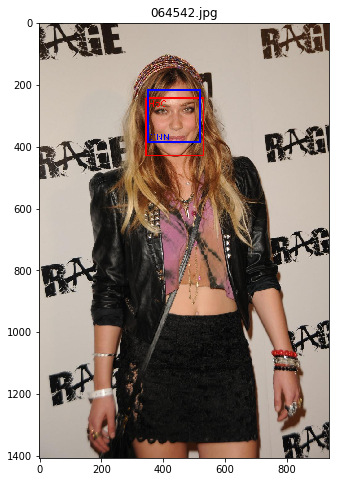

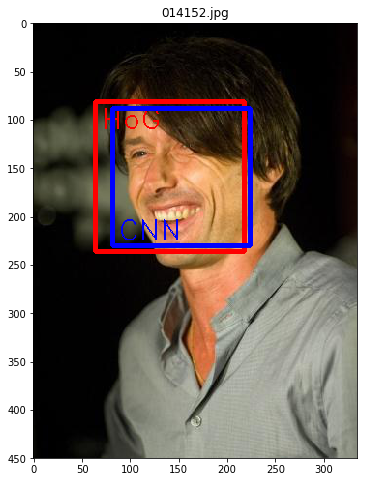

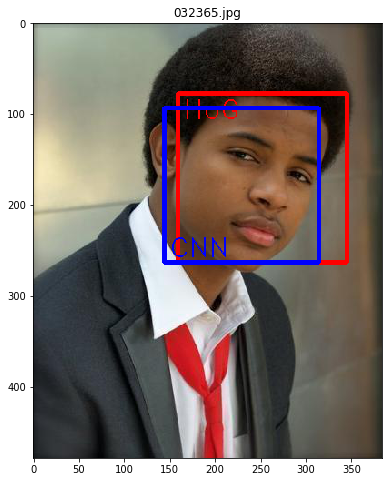

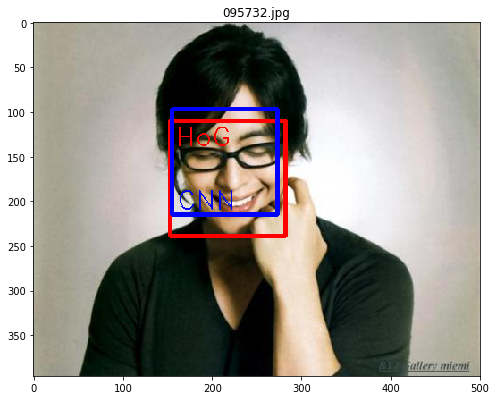

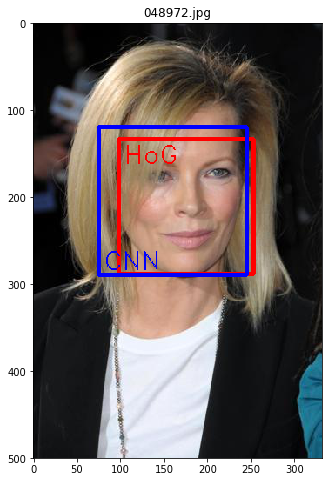

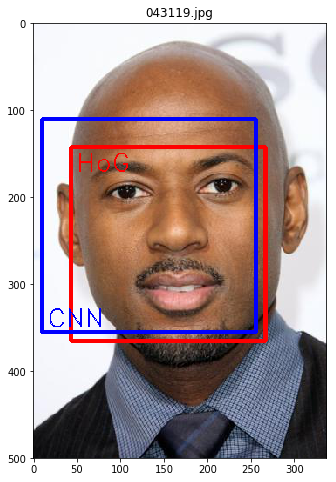

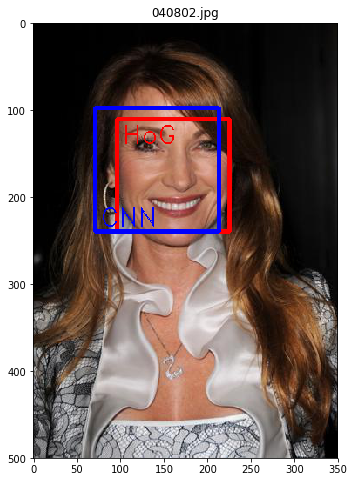

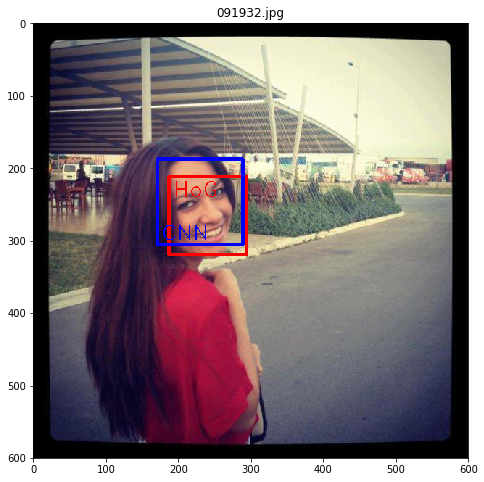

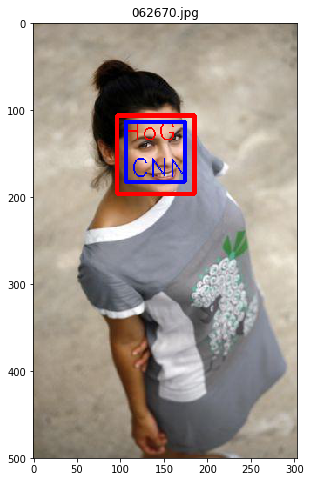

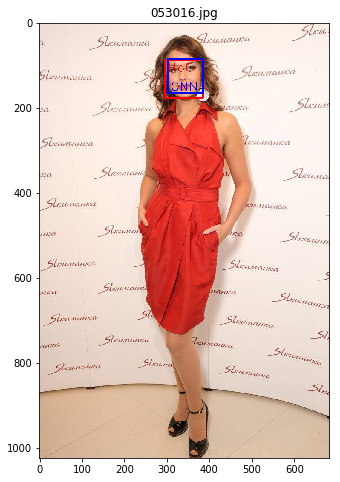

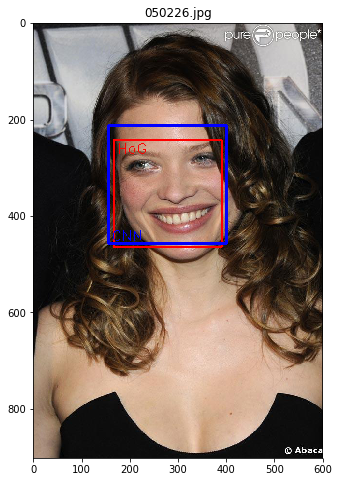

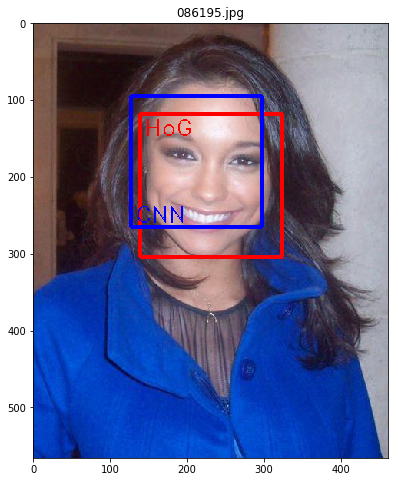

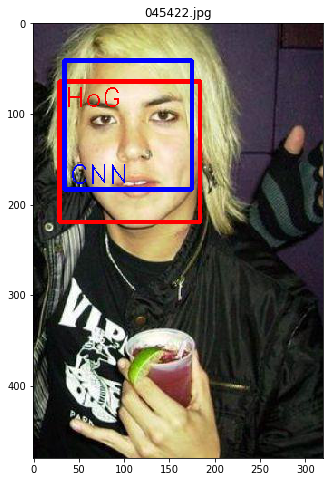

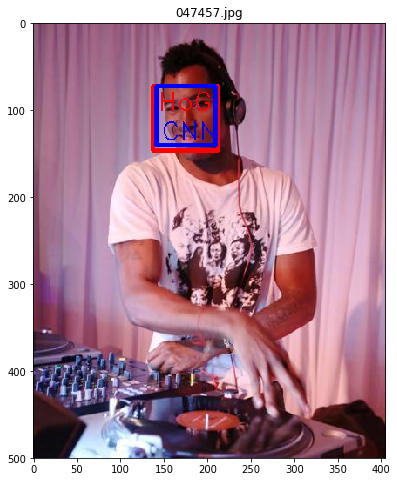

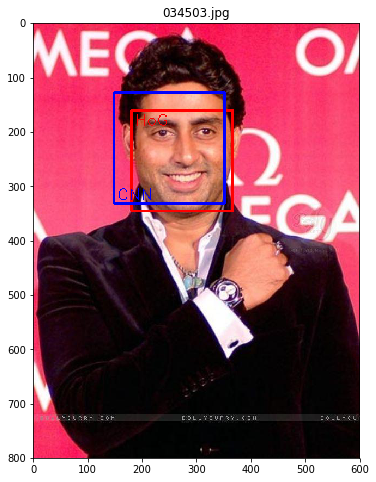

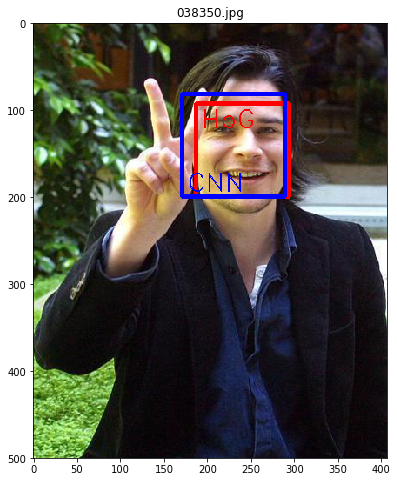

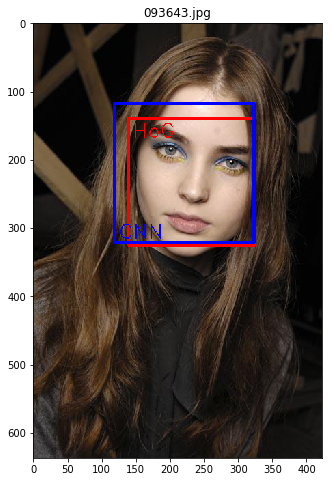

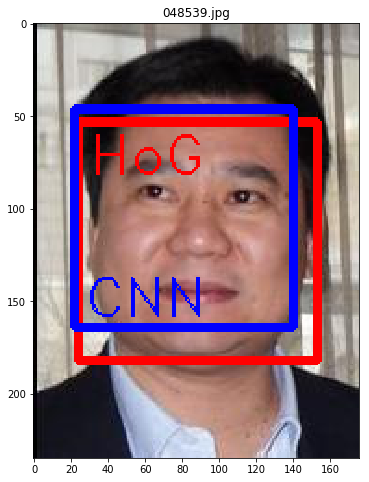

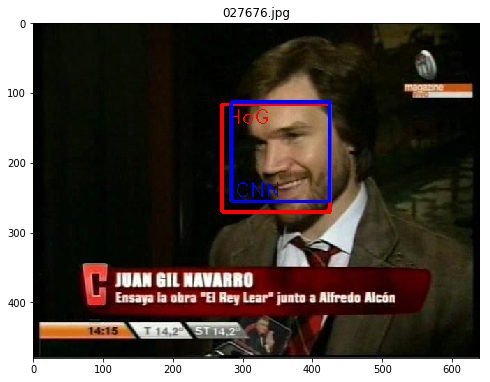

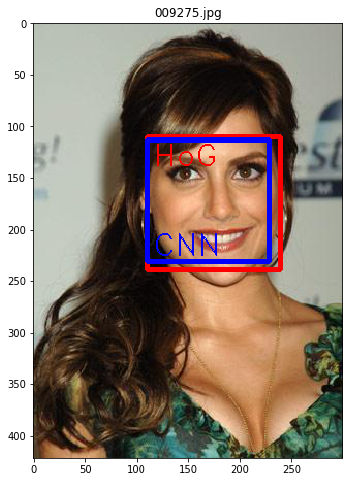

In [3]:
plt.close('all')

# Process data
for img_name, img in image_batch.items():
    # Extract faces
    face_location = face_recognition.face_locations(img, model='hog')
    face_location_cnn = face_recognition.face_locations(img, model='cnn')

    # Draw rectangles
    if face_location:
        top, right, bottom, left = face_location[0]
        cv2.rectangle(img, (left, top), (right, bottom), (255,0,0), 3)
        cv2.putText(img, 'HoG', (left + 6, top + 28), cv2.FONT_HERSHEY_DUPLEX,
                    1.0, (255,0,0), 1)
    if face_location_cnn:
        top, right, bottom, left = face_location_cnn[0]
        cv2.rectangle(img, (left, top), (right, bottom), (0,0,255), 3)
        cv2.putText(img, 'CNN', (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX,
                    1.0, (0,0,255), 1)

    # Plot
    fig, ax = plt.subplots(figsize=(8,8))
    plt.imshow(Image.fromarray(img))
    ax.set_title(img_name)